**K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification and regression. It is a non-parametric and instance-based learning algorithm that classifies a new data point based on its K nearest neighbors in the feature space.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
iris = load_iris()
df = pd.concat([(pd.DataFrame(data=iris['data'], columns=iris['feature_names'])),
                (pd.DataFrame(data=iris['target'], columns=['target']))], axis=1)
df.replace({'target':{0:'setosa', 1:'versicolor', 2:'virginica'}}, inplace = True)

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ipython-input-8-89df78e3a729>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


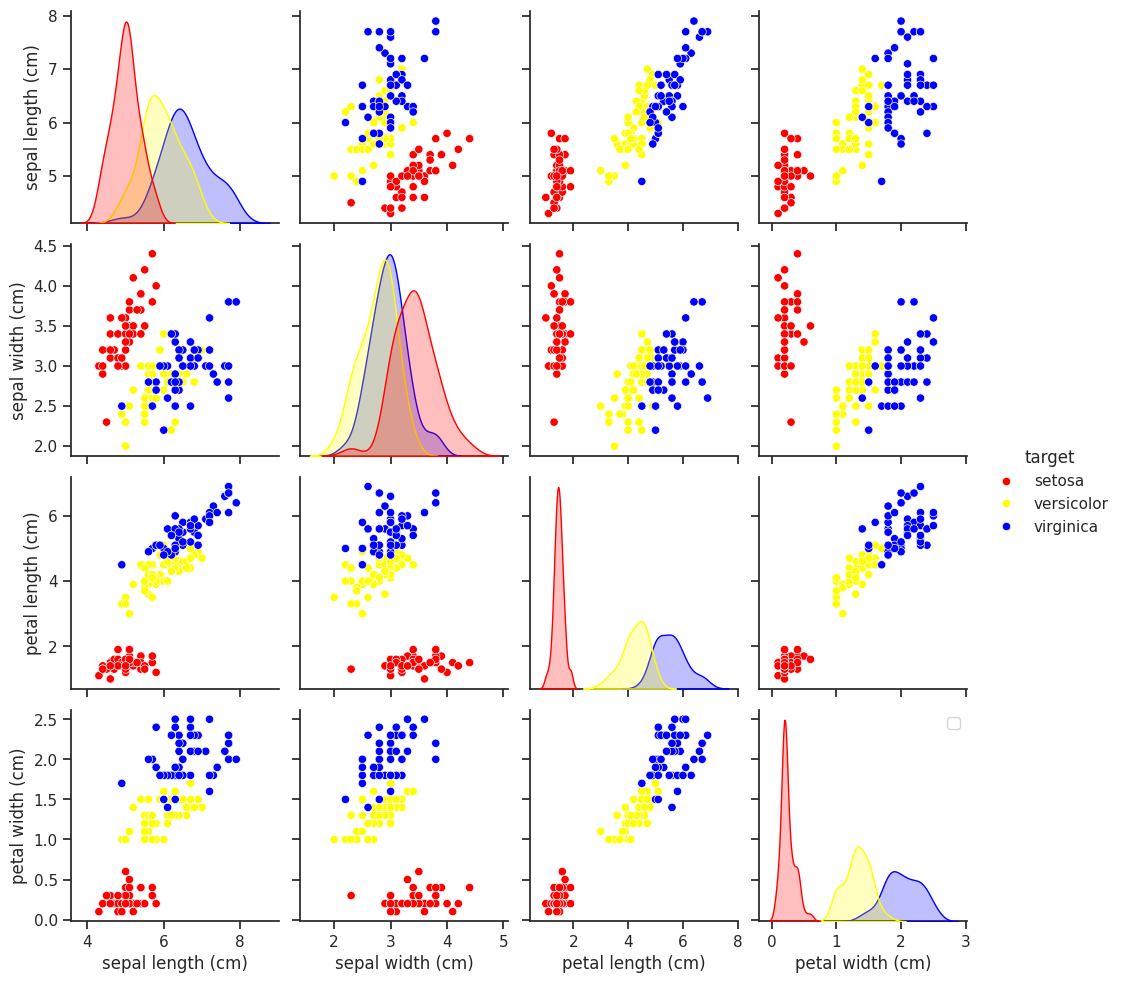

In [8]:
sns.set(style="ticks")
sns.pairplot(df, hue="target", palette={"setosa": "red", "versicolor": "yellow", "virginica": "blue"})
plt.legend(loc='upper right')
plt.show()

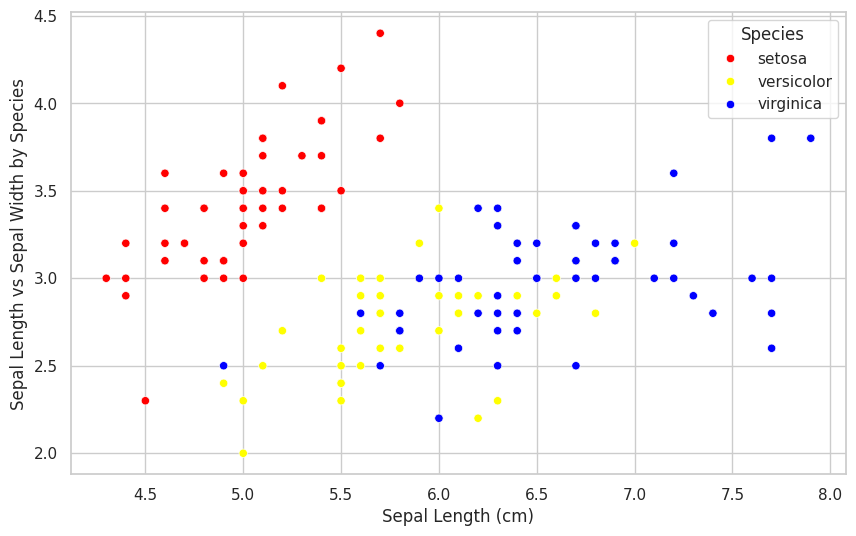

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', palette={'setosa': 'red', 'versicolor': 'yellow', 'virginica': 'blue'}, data=df)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Length vs Sepal Width by Species')
plt.legend(title='Species', loc='upper right')
plt.show()

In [10]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2401)
len(X_train), len(X_test)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
y_pred = knn.predict(X_test)
y_pred

array(['setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica'],
      dtype=object)

In [12]:
y_test

,target
39,setosa
46,setosa
60,versicolor
118,virginica
97,versicolor
29,setosa
15,setosa
6,setosa
64,versicolor
78,versicolor


In [13]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [15]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  7]])

In [16]:
df.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
19,5.1,3.8,1.5,0.3,setosa


In [17]:
predicted_classes = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))
new_data = pd.DataFrame({
    'sepal length (cm)': [sepal_length],
    'sepal width (cm)': [sepal_width],
    'petal length (cm)': [petal_length],
    'petal width (cm)': [petal_width]
})

Enter sepal length (cm): 2.6
Enter sepal width (cm): 1.5
Enter petal length (cm): 2.6
Enter petal width (cm): 1


In [18]:
new_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,2.6,1.5,2.6,1.0


In [19]:
predicted_class = knn.predict(new_data)
predicted_class

array(['setosa'], dtype=object)

In [20]:
predicted_class_name = predicted_class[0]
predicted_class_name

'setosa'